<a href="https://colab.research.google.com/github/IraniS12/202255202004_shilvia-irani-sukri/blob/main/tugasdeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid
import os
import zipfile
import gdown
import shutil

In [28]:
# 3. Import Library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import shutil

# Step 1: Download file dari Google Drive
file_id = "1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k"
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "dataset.zip"

gdown.download(url, output_path, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k
From (redirected): https://drive.google.com/uc?id=1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k&confirm=t&uuid=063b6569-891e-4d6e-93ff-2bfc2ec51868
To: /content/dataset.zip
100%|██████████| 39.5M/39.5M [00:01<00:00, 28.0MB/s]


'dataset.zip'

In [3]:
# Step 2: Ekstrak file
extract_dir = "dataset"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)



In [4]:

# Step 3: Cek isi folder
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")
    for d in dirs:
        print(f"   📂 {d}")
    for f in files:
        print(f"   📄 {f}")

📁 Folder: dataset
   📂 Foto buah jeruk
   📂 Foto buah jambu
   📂 Foto buah langsat
   📂 Foto buah rambutan
📁 Folder: dataset/Foto buah jeruk
   📄 IMG_20250418_123752.jpg
   📄 IMG_20250418_124041.jpg
   📄 IMG_20250418_124021.jpg
   📄 IMG_20250418_123433.jpg
   📄 IMG_20250418_124035.jpg
   📄 IMG_20250418_124539.jpg
   📄 IMG_20250418_124015.jpg
   📄 IMG_20250418_124255.jpg
   📄 IMG_20250418_124734.jpg
   📄 IMG_20250418_123816.jpg
   📄 IMG_20250418_123755.jpg
   📄 IMG_20250418_124254.jpg
   📄 IMG_20250418_124413.jpg
   📄 IMG_20250418_123153.jpg
   📄 IMG_20250418_123255_1.jpg
   📄 IMG_20250418_123619.jpg
   📄 IMG_20250418_123151.jpg
   📄 IMG_20250418_124019.jpg
   📄 IMG_20250418_123911.jpg
   📄 IMG_20250418_124217.jpg
   📄 IMG_20250418_123300.jpg
   📄 IMG_20250418_123429.jpg
   📄 IMG_20250418_123119.jpg
   📄 IMG_20250418_124534.jpg
   📄 IMG_20250418_124733.jpg
   📄 IMG_20250418_123137.jpg
   📄 IMG_20250418_124052.jpg
   📄 IMG_20250418_123150.jpg
   📄 IMG_20250418_123751.jpg
   📄 IMG_2025041

In [5]:
# Path ke dataset
data_path = "/content/dataset"  # ganti jika folder kamu beda


In [6]:
# Data Transformasi
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val_test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}


In [7]:
# Load dataset
full_dataset = datasets.ImageFolder(data_path, transform=transform['train'])
class_names = full_dataset.classes

In [33]:
 #plit train, val, test (70/15/15)
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_set, val_set, test_set = random_split(full_dataset, [train_size, val_size, test_size])
val_set.dataset.transform = transform['val_test']
test_set.dataset.transform = transform['val_test']

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)


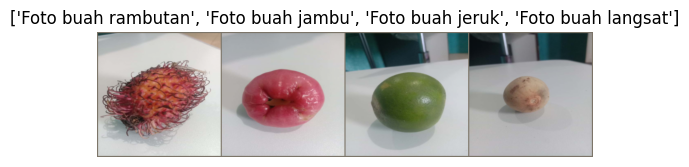

In [9]:
# Tampilkan sample gambar
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

images, labels = next(iter(train_loader))
imshow(make_grid(images[:4]), title=[class_names[l] for l in labels[:4]])

In [35]:
# 6. Bangun model MobileNetV3
base_model = tf.keras.applications.MobileNetV3Large(input_shape=img_size + (3,),
                                                    include_top=False,
                                                    weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'num_classes' is not defined

In [26]:
# 7. Training
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=50)

AttributeError: 'MobileNetV3' object has no attribute 'fit'

batasan


In [13]:
# 1. Install library tambahan
!pip install gdown -q

# 2. Download dataset dari Google Drive (pakai file ID)
import gdown
import zipfile
import os

In [14]:
# File ID dari link: https://drive.google.com/file/d/1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k/view
file_id = '1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k'
output = 'dataset.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k
From (redirected): https://drive.google.com/uc?id=1KewFL9fwVCF4mwjTE0WKozmp9y8ZPs-k&confirm=t&uuid=9d781a66-c0f8-445a-b8ce-e1673c4aee76
To: /content/dataset.zip
100%|██████████| 39.5M/39.5M [00:00<00:00, 90.1MB/s]


'dataset.zip'

In [15]:
# Ekstraksi file zip
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset_silpi')



In [16]:
# 3. Cek struktur direktori
import os
base_dir = 'dataset_silpi'
for root, dirs, files in os.walk(base_dir):
    print(root, len(dirs), len(files))


dataset_silpi 4 0
dataset_silpi/Foto buah jeruk 0 300
dataset_silpi/Foto buah jambu 0 300
dataset_silpi/Foto buah langsat 0 300
dataset_silpi/Foto buah rambutan 0 300


In [17]:

# 4. Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [20]:
# 5. Model MobileNetV3 (kode kamu)
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV3Large(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False  # Transfer learning

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Training 50 epoch
history = model.fit(train_gen, validation_data=val_gen, epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 391ms/step - accuracy: 0.2786 - loss: 1.4382 - val_accuracy: 0.2500 - val_loss: 1.3754
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.3115 - loss: 1.3646 - val_accuracy: 0.2500 - val_loss: 1.3539
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.3139 - loss: 1.3621 - val_accuracy: 0.4125 - val_loss: 1.3243
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.3754 - loss: 1.3229 - val_accuracy: 0.4958 - val_loss: 1.3030
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.4327 - loss: 1.2957 - val_accuracy: 0.3583 - val_loss: 1.2882
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.4030 - loss: 1.2783 - val_accuracy: 0.5375 - val_loss: 1.2512
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.4497 - loss: 1.2530 - val_accuracy: 0.3333 - val_loss: 1.2747
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.4052 - loss: 1.2620 - val_acc

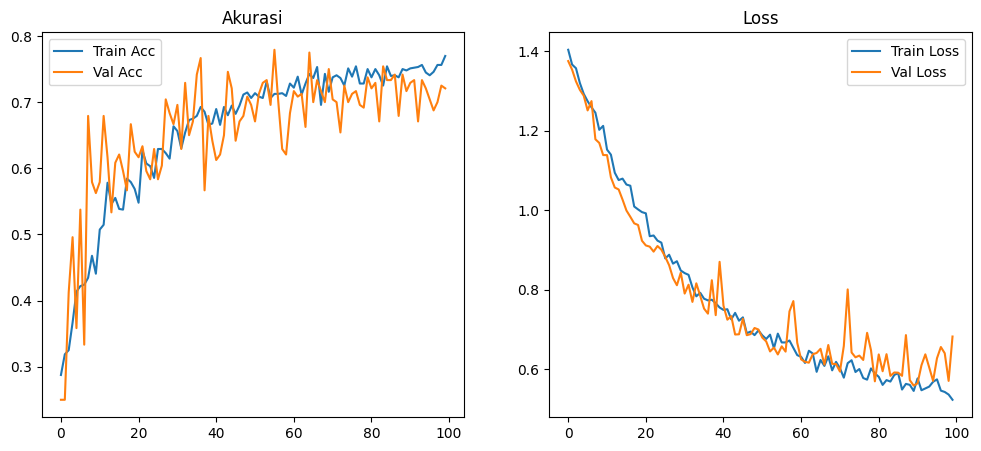

In [22]:
# 7. Visualisasi Akurasi dan Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Akurasi")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()
